# Assignment 1



In this assignment, we will learn how to download data from the Yahoo Finance dataset. We will learn how to plot and perform some simple analysis of the datase.

This code is created by Dr. Teerasit Kasetkasem on December 8, 2020

## Download stock price from Yahoo Finance

There are approaches to download stock price from Yahoo Finance. Here, We use the panadas_datareader library to download.

In [1]:
import pandas as pd
import pandas_datareader as reader
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
apple = reader.DataReader("AAPL", "yahoo","2010-01-01","2020-12-31") #load Apple Inc. (AAPL) from yahoo finance from 2010/01/01 to 2020/12/31
apple.head() # print first few heading rows. 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.539882
2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.551187
2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.446983
2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.435065
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.477847


In this exercise, the goal is to find the dividends that Apple has issued for the last 10 years.

Text(0, 0.5, 'Difference in Change')

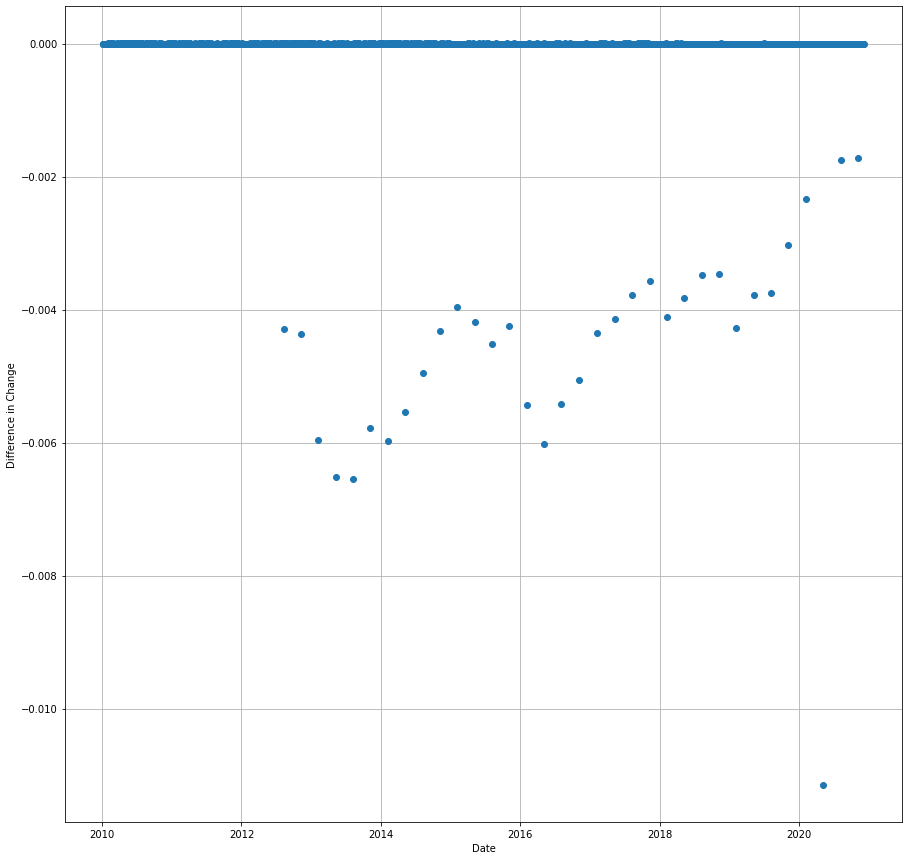

In [ ]:
adj_close = apple['Adj Close'] # adjusted close prices
pct_adj_close = adj_close.pct_change(1) # find daily percent changes 
close = apple['Close'] # close price
pct_close = close.pct_change(1) # find daily percent changes 
plt.figure(figsize=(15,15))
plt.plot(pct_close- pct_adj_close, "o")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Difference in Change")

From the graph above, it is clear that, most of the times, normalized changes in the close and adj. close prices are similar. However, there are few cases where changes in adj. close prices are higher that close price. This is the location where dividens are paid to share holders.

In [ ]:
delta = pct_close- pct_adj_close 
threshold = -0.001 # We pick threshold = -0.001 from the graph.
delta = delta[delta<threshold] # screen only the location where differences is less than -0.001
print("The dividens are paid out on:")
for date in delta.index:
  print(date.date())

The dividens are paid out on:
2012-08-09
2012-11-07
2013-02-07
2013-05-09
2013-08-08
2013-11-06
2014-02-06
2014-05-08
2014-08-07
2014-11-06
2015-02-05
2015-05-07
2015-08-06
2015-11-05
2016-02-04
2016-05-05
2016-08-04
2016-11-03
2017-02-09
2017-05-11
2017-08-10
2017-11-10
2018-02-09
2018-05-11
2018-08-10
2018-11-08
2019-02-08
2019-05-10
2019-08-09
2019-11-07
2020-02-07
2020-05-08
2020-08-07
2020-11-06


Next, we try to find the dividends payout by Apples.

In [ ]:
dividends =[]
for date in delta.index:
  k = np.nonzero(apple.index==date)[0][0] # find the row where dividends have been paid.
  close_before = close[k-1]
  pct_close_div = pct_close[k]
  pct_adj_div = pct_adj_close[k]
  dividend = close_before * ( pct_adj_div - pct_close_div)
  dividends.append(dividend)
dividends = pd.Series(dividends, index=delta.index)
print(dividends)

Date
2012-08-09    0.095181
2012-11-07    0.091020
2013-02-07    0.097456
2013-05-09    0.107979
2013-08-08    0.108710
2013-11-06    0.108620
2014-02-06    0.109559
2014-05-08    0.117290
2014-08-07    0.117481
2014-11-06    0.117834
2015-02-05    0.118339
2015-05-07    0.130805
2015-08-06    0.130282
2015-11-05    0.129399
2016-02-04    0.131042
2016-05-05    0.141927
2016-08-04    0.143387
2016-11-03    0.140974
2017-02-09    0.143529
2017-05-11    0.158858
2017-08-10    0.152495
2017-11-10    0.156974
2018-02-09    0.159427
2018-05-11    0.181813
2018-08-10    0.181950
2018-11-08    0.181865
2019-02-08    0.182718
2019-05-10    0.189834
2019-08-09    0.190913
2019-11-07    0.194722
2020-02-07    0.189884
2020-05-08    0.846399
2020-08-07    0.200337
2020-11-06    0.204769
dtype: float64



When comparing to the data given in [Adj. dividends](https://www.dividend.com/stocks/technology/hardware/communications-equipment/aapl-apple-inc/), we found that the dividend on 2020-05-08 is significantly differences from computed values. Here, computed values is 0.846 whereas the actual dividend is 0.205. This result shows the unreliability of Yahoo Finance Dataset.

In [ ]:
dividends['2020-05-08'] = 0.205 #Fix the error from yahoo finance

In [ ]:
yearly_dividends = []
for y in range(2015,2021): # Find dividens growth rate in the last 5 years.
  dividend_year = dividends[dividends.index.year == y] #filter only one year
  yearly_dividends.append(dividend_year.sum()) # find total dividens per year
yearly_dividends = pd.Series(yearly_dividends, index=np.arange(2015,2021))
dividend_growth = yearly_dividends.pct_change(1).dropna()
print("Yearly dividends: ")
print(yearly_dividends)
print("Dividend growth rate: ")
print(dividend_growth)
g = dividend_growth.median()
print(f"Dividends growth rate is {g*100} %.")

Yearly dividends: 
2015    0.508825
2016    0.557330
2017    0.611855
2018    0.705055
2019    0.758187
2020    0.799990
dtype: float64
Dividend growth rate: 
2016    0.095326
2017    0.097834
2018    0.152323
2019    0.075359
2020    0.055135
dtype: float64
Dividends growth rate is 9.53255784880227 %.


Now, we can use discount factor to compute the stock price

In [ ]:
r = 0.1 # Assume that we can find the risk-free security at 10%
S_apple = yearly_dividends[2020]/(r - g) # D1/(r - g)
print(f"The current apple stock price is {adj_close.iloc[-1]}.") # 
print(f"From the Discounted Cash Flow model, Apple Stock price is {S_apple}.")


The current apple stock price is 123.75.
From the Discounted Cash Flow model, Apple Stock price is 171.14209144610632.


## Class work

**Follow the above steps to find dividends, dividend growth rate, and DCF of  5 stocks in SET50, namely**

> Indented block




1.  ADVANC
2.  KBANK
3.  PTT
4.  BDMS 
5.  BEM



---


**Here, you will use only the data from the past 5 years. **




# **Solution:**

In [3]:
stocks = ["ADVANC", "KBANK", "PTT", "BDMS", "BEM"]
data_frames = dict()
for stock in stocks:
  data_frames[stock] = reader.DataReader(f"{stock}.BK", "yahoo","2016-01-01","2020-12-31") #load data from 2016-01-01 to 2020-12-31

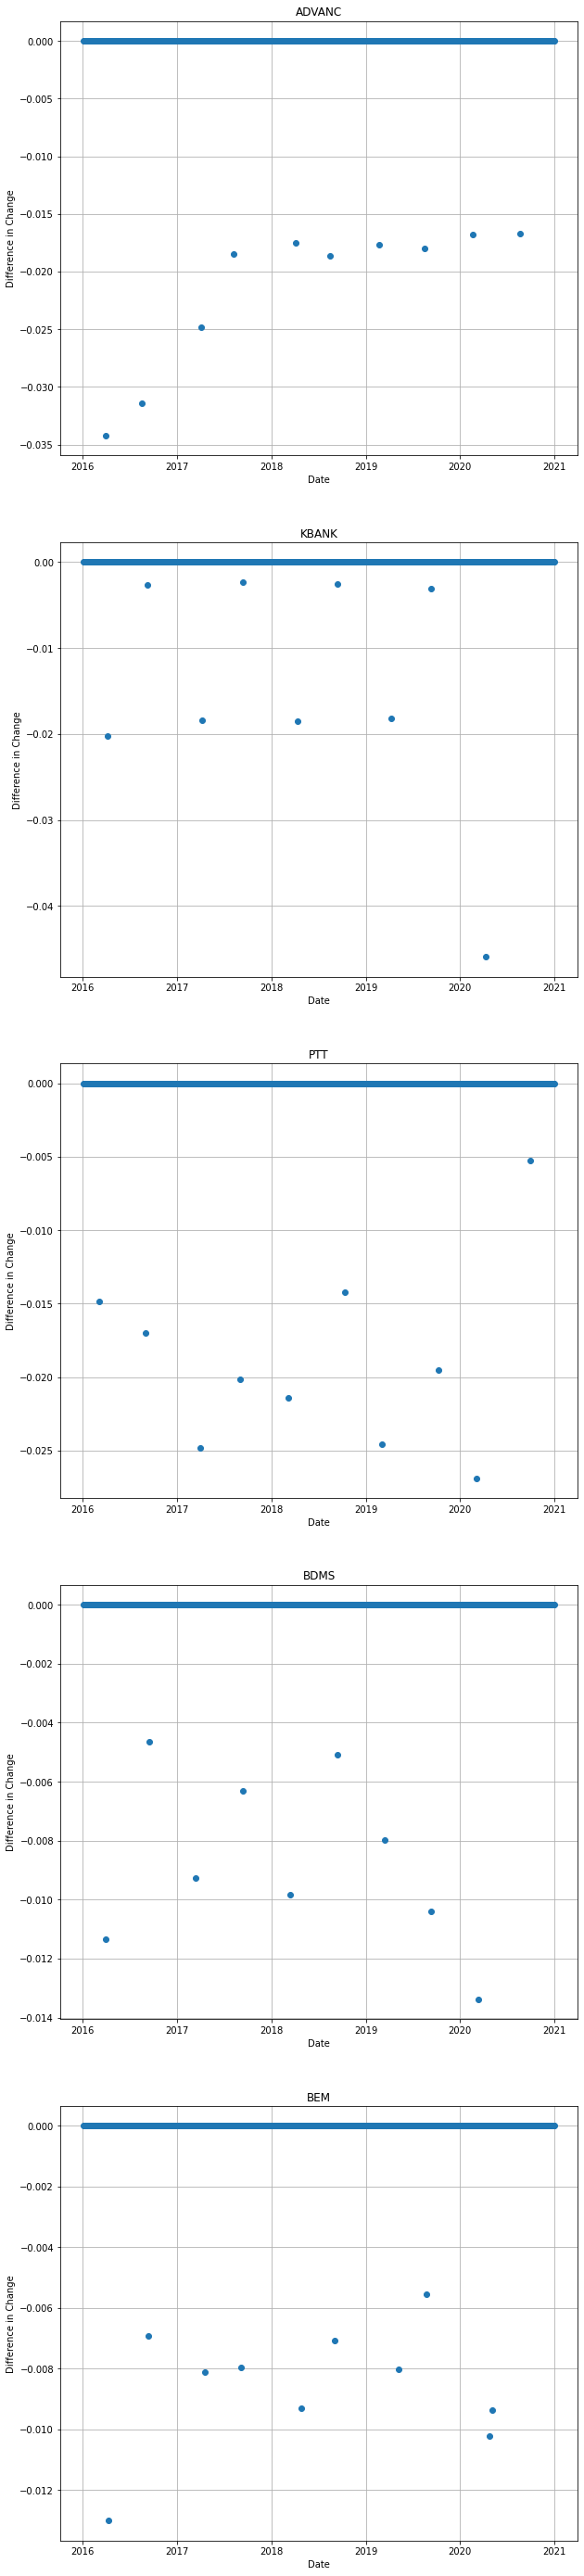

In [5]:
plt.figure(figsize=(10,50))
for k in range(5):
  plt.subplot(5,1,k + 1)
  stock = stocks[k]
  adj_close = data_frames[stock]['Adj Close'] # adjusted close prices
  pct_adj_close = adj_close.pct_change(1) # find daily percent changes 
  close = data_frames[stock]['Close'] # close price
  pct_close = close.pct_change(1) # find daily percent changes   
  plt.plot(pct_close- pct_adj_close, "o")
  plt.grid()
  plt.title(f"{stock}")
  plt.xlabel("Date")
  plt.ylabel("Difference in Change")

In [6]:
for stock in stocks:
  adj_close = data_frames[stock]['Adj Close'] # adjusted close prices
  pct_adj_close = adj_close.pct_change(1) # find daily percent changes 
  close = data_frames[stock]['Close'] # close price
  pct_close = close.pct_change(1) # find daily percent changes   
  delta = pct_close- pct_adj_close 
  threshold = -0.001 # We pick threshold = -0.001 from the graph.
  delta = delta[delta<threshold] # screen only the location where differences is less than -0.001
  print(f"The dividens of {stock} are paid out on:")
  for date in delta.index:
    print("      ", date.date())

The dividens of ADVANC are paid out on:
       2016-03-31
       2016-08-15
       2017-04-05
       2017-08-07
       2018-04-05
       2018-08-15
       2019-02-20
       2019-08-16
       2020-02-19
       2020-08-19
The dividens of KBANK are paid out on:
       2016-04-05
       2016-09-06
       2017-04-07
       2017-09-12
       2018-04-11
       2018-09-12
       2019-04-11
       2019-09-11
       2020-04-09
The dividens of PTT are paid out on:
       2016-03-03
       2016-08-31
       2017-03-29
       2017-08-31
       2018-03-06
       2018-10-11
       2019-03-06
       2019-10-10
       2020-03-04
       2020-09-30
The dividens of BDMS are paid out on:
       2016-03-29
       2016-09-13
       2017-03-13
       2017-09-12
       2018-03-14
       2018-09-12
       2019-03-14
       2019-09-11
       2020-03-11
The dividens of BEM are paid out on:
       2016-04-11
       2016-09-12
       2017-04-19
       2017-09-05
       2018-04-27
       2018-09-04
       2019-05-07

In [17]:
for stock in stocks:
  adj_close = data_frames[stock]['Adj Close'] # adjusted close prices
  pct_adj_close = adj_close.pct_change(1) # find daily percent changes 
  close = data_frames[stock]['Close'] # close price
  pct_close = close.pct_change(1) # find daily percent changes   
  delta = pct_close- pct_adj_close 
  threshold = -0.001 # We pick threshold = -0.001 from the graph.
  delta = delta[delta<threshold] # screen only the location where differences is less than -0.001
  dividends =[]
  for date in delta.index:
    k = np.nonzero(data_frames[stock].index==date)[0][0] # find the row where dividends have been paid.
    close_before = close[k-1]
    pct_close_div = pct_close[k]
    pct_adj_div = pct_adj_close[k]
    dividend = close_before * ( pct_adj_div - pct_close_div)
    dividends.append(dividend)
  dividends = pd.Series(dividends, index=delta.index)
  yearly_dividends = []
  for y in range(2016,2021): # Find dividens growth rate in the last 5 years.
    dividend_year = dividends[dividends.index.year == y] #filter only one year
    yearly_dividends.append(dividend_year.sum()) # find total dividens per year
  yearly_dividends = pd.Series(yearly_dividends, index=np.arange(2016,2021))
  print(f"Yearly dividends of {stock} :")
  print(yearly_dividends)
  dividend_growth = yearly_dividends.pct_change(1).dropna() 
  g = dividend_growth.median()
  print(f"Dividends growth rate of {stock} is {g*100} %.")
  r = 0.1 # Assume that we can find the risk-free security at 10%
  if g< r:
    S_val = yearly_dividends[2020]/(r - g) # D1/(r - g)
    print(f"    The current {stock} price is {adj_close.iloc[-1]}.") # 
    print(f"    From the Discounted Cash Flow model, {stock} price is {S_val}.")
  else:
    print(f"    The current {stock} price is {adj_close.iloc[-1]}.") # 
    print(f"    From the Discounted Cash Flow model, {stock} price is infinity.")


Yearly dividends of ADVANC :
2016    12.271264
2017     7.794728
2018     7.271880
2019     7.133484
2020     6.779301
dtype: float64
Dividends growth rate of ADVANC is -5.836396772718261 %.
    The current ADVANC price is 176.0.
    From the Discounted Cash Flow model, ADVANC price is 42.808356107563114.
Yearly dividends of KBANK :
2016    3.905570
2017    4.060947
2018    4.144288
2019    4.030586
2020    4.594241
dtype: float64
Dividends growth rate of KBANK is 3.015296811474988 %.
    The current KBANK price is 113.0.
    From the Discounted Cash Flow model, KBANK price is 65.77574900024526.
Yearly dividends of PTT :
2016    1.006189
2017    1.812689
2018    1.971280
2019    2.091720
2020    1.270014
dtype: float64
Dividends growth rate of PTT is 7.4293239795086174 %.
    The current PTT price is 42.5.
    From the Discounted Cash Flow model, PTT price is 49.403885044484056.
Yearly dividends of BDMS :
2016    0.359770
2017    0.319788
2018    0.358172
2019    0.444555
2020    0.294